Data sets format: 
files:
* TotalFlights.csv
* DelayFlights.csv
* DelayRatio.csv
* airport2idx.csv
* time_stamp2idx.csv
* test.csv
* readme.ipynb

this.ipynb provide helper function and a top class `GraphFlow` object  `gf` to generate the following data:

* `gf.TotalFlights`: pd.DataFrame with value  of shape (N,A)

`gf.TotalFlights[t,i]` is number of flights between [`idx2time_stamp[t]`,`idx2time_stamp[t] + dt`) at airport `idx2airport[i]`

* `gf.DelayFlights`: pd.DataFrame with value of shape (N,A)

`gf.DelayFlights[t,i]` is number of delayed flights between [`idx2time_stamp[t]`,`idx2time_stamp[t] + dt`) at airport `idx2airport[i]`

* `gf.DelayRatio`:  pd.DataFrame with value of shape (N,A)

`gf.DelayRatio[t,i] = DelayFlights[t,i] / TotalFlights[t,i]`

* `gf.RealTotalFlights`,`gf.RealDelayFlights`,`gf.RealDelayRatio`: pd.DataFrame with same value but with real index

* `gf.idx2airport`: dict 

`gf.idx2airport[i]` return  the iata name for airport index ` i `

* `gf.airport2idx`: dict

inverse to `idx2airport`

* `gf.idx2time_stamp`: dict

`gf.idx2time_stamp[t]` return  the timestamp for time index ` t `

* `gf.time_stamp2idx`: dict

inverse to `idx2time_stamp[t]`

* `gf.dt`:pd.TimeDelta 

`1D` or `1H` so far

* `test_index` :list of lenth M
element is time index at which model predicts the delay ratio. In our case, all elements `tidx in test_index`' satisfy `idx2time_stamp[tidx]` after `2018-01-01 00:00:00`

* `gf.G` :  nx.DiGraph with edges having weight attr as the total flights in  time range.

* `gf.pre_data` provide pre-cleaned raw data in time range.



`readme.ipynb` also provide a model evaluation function `model_evaluation(pred_data)`. 

* 1. run next block to generate data
* 2. tune your model, generate a np.ndarrays obeject `pred_data` of shape  `(M,A)`
`pred_data[j,:]` gives the predicted delay ratio for time index `test_index[j]`
* 3. report `model_mse(pred_data)`, save `pred_data`

`readme.ipynb`  provide some helper functions. 

* `gf.describe()` : describe the current GraphFlow obeject

* `gf.real_format(df)` : convert a dataframe into colums by timeseris and index by airports names
* `gf.draw_network_attr(nodes_attr= None,edges_attr='weight',size=10,with_pos=True)` :  draw undirected graph `fun_1_to_undir_G(G)` try several times to get a better display

* `gf.sub_graph_flow(start_time,end_time,sub_nodes = None)` : 

** Generate a sub  graph flow. In this case all 'DataFrame' including `TotalFlights`,`DelayFlights`,`DelayRatio` will be re-computed as sub_nodes will build a smaller GraphFlow. This genertion speed is very slow. 2 min per airport

** If `sub_nodes` is `None`, `gf.sub_graph_flow` can compute very fast as no dataframe will be reproduced.

## Multi-linear regression task for ArrDelayFlights for a given airport.

Using the material https://newonlinecourses.science.psu.edu/stat501/lesson/welcome-stat-501 Lesson 5,6,7,9,10. To do a multiMulti linear regression.

* 1.Choose four representive airports (One 'LAX', one other big airport, one middle, one small airport) for each airport `a` and `gf.dt` do the following.
* 2. The responce is the `gf.DepDelayFlights[t,a]` which stands for the numbr of ArrDelayFlights for `a` between `t` and `t`+`gf.dt`, where `t` takes values in `gf.grid`and `t` later than `2018/01/01`
* 3. The predictors are chosen manully. Here is general rules:
* 3.1 all predictors should be obtained before or at `t` 
* 3.2 here are some candidates: 
* 3.2.1 timeseries flavored predictors : lags `gf.ArrDelayFlights[t-1,a]`,`gf.ArrDelayFlights[t-2,a]`,..., 
* 3.2.2 `gf.ArrDelayFlights[t-1,a]`, `t` correspoding time status `is_Tuesday`,`is_Monday`,..., `is_Weekend`, `is_Holiday`,`season`,
* 3.2.3 some constructed data: e.g. average of ArrDelayFlights at `t-1` for all airports which is the neighbour of `a`
* 4. about model building. try to understand the data and answer following question, which predictors best gives the best fit. If the fit is not good try to do the following

>If important predictor variables are omitted, see whether adding the omitted predictors improves the model.

>If the mean of the response is not a linear function of the predictors, try a different function. For example, polynomial regression involves transforming one or more predictor variables while remaining within the multiple linear regression framework. For another example, applying a logarithmic transformation to the response variable also allows for a nonlinear
relationship between the response and the predictors while remaining within the multiple linear regression framework.

>If there are unequal error variances, try transforming the response and/or predictor variables or use "weighted least squares regression."

>If an outlier exists, try using a "robust estimation procedure."

>If error terms are not independent, try fitting a "time series model."
> Try some data transformations

* 5 python,R either is ok only report is needed.






##  Coding instruction for gf.quotient_graph_flow(self, start_time,end_time,node_groups = None)
* 0. `start_time`,`end_time` are `str` nodes_groups is of type `**str`
* 1. Return a `GraphFlow` object `quo_gf` and `dict` object `group_names`
* 2. Do the following:
* 2.0 if not `node_groups` run gf.sub_graph(start_time,end_time)
* 2.1 check `node_groups` is a partition of `self.G.nodes` if not: raise error.
* 2.2 `quo_gf` has following data:
* 2.2.1 `quo_gf.G` has nodes with aritrary distinct names of `str` type(four letters maybe?), for each one node correspond to a group in `node_groups`, generate a dict `group_names` with key being node ,value is corresponding group in `node_groups`
* 2.2.11 node in `quo_gf.G` has no `weight` attr if it raise a problem contact Jiayin
* 2.2.12 node in `quo_gf.G` has `pos` attr ,randomly given (may use spring_layout)
* 2.2.21 edges`(a,b)` in `quo_gf.G.edges` has `weight` attr , the `sum` of number of flights in self.pre_data within `grid`
check sub_graph to see how to generate it using `start_time`,`end_time`.
* 2.2.22 edges`(a,b)` in `quo_gf.G.edges` has `distance` attr , the `mean` of `Distance` of flights in self.pre_data within `grid`(one may use approximation to faster this computation,weighted sum of distance in self.G.edges?)
check `sub_graph_flow()` to see how to generate it using `start_time`,`end_time`.
* 2.2.3 `quo_gf.pre_data` has records `rec` in self.predata within `grid`, check `sub_graph_flow()` for within's meaning. `rec.Origin` should update to `a` if `rec.Origin` in `group_names[a]`. update `rec.Dest` similarly
* 2.2.4 generate other data in `quo_gf` accordingly. 

* 3. coding efficiently note that the nodes has size around 311 pre_data has size 14M.  if necessary reconstruct `fun_1_delay_rate()` as it is the bottle neck.
* 4. write a demo testing all available member function for `quo_gf`


In **this** notebook,  run `gf.describe()` to see general infomation
When using model to pridiction. one **CAN NOT** use the data at or after `idx2time_stamp[t]` to

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from datetime import datetime,timedelta
from pytz import timezone
from time import time

from collections import deque
from functools import reduce
from itertools import chain
  
def model_evaluation(pred_data,test_data=None):
    test_index=list(pd.read_csv("test.csv",index_col=0,header=None).values.T[0,:])
    DelayRatio=pd.read_csv("DelayRatio.csv",index_col=0)
    return np.mean(np.mean(np.square(DelayRatio.fillna(0).iloc[:,test_index].T-pred_data),axis=0))

In [3]:
class GraphFlow:
    #================= 08/16/19 maintained by Jiayin Guo=============
    def __init__(self,idx2airport,airport2idx,idx2time_stamp,time_stamp2idx,TotalFlights,DelayFlights,pre_data,G,dt,grid = None ,start_time = None,end_time = None,DelayRatio=None):
        self.idx2airport = idx2airport
        self.airport2idx = airport2idx
        self.idx2time_stamp = idx2time_stamp
        self.time_stamp2idx = time_stamp2idx
        self.TotalFlights = TotalFlights
        self.DelayFlights = DelayFlights
        self.G = G
        self.pre_data=pre_data
        self.dt = dt
        
        #=========== self.grid=============
        if grid is not None:
            self.grid = grid
        elif (start_time is not None) & (end_time is not None):
            self.grid = pd.date_range(start_time,end_time,freq=dt,tz=timezone('America/Los_Angeles'))
        else:
            raise
        #=========== self.DelayRatio=============
        if DelayRatio is not None:
            self.DelayRatio = DelayRatio
        else:
            print(DelayFlights.shape)
            print(TotalFlights.shape)
            self.DelayRatio = pd.DataFrame(data=DelayFlights.values/TotalFlights.values,index=DelayFlights.index,
                   columns=DelayFlights.columns)
            
        #=================self.RealDelayRatio,RealTotalFlights,RealDelayFlights====
        self.RealDelayRatio = self.DelayRatio.rename(index = self.idx2time_stamp).rename(columns = self.idx2airport)
        self.RealDelayFlights = self.DelayFlights.rename(index = self.idx2time_stamp).rename(columns = self.idx2airport)
        self.RealTotalFlights = self.TotalFlights.rename(index = self.idx2time_stamp).rename(columns = self.idx2airport)
            
        
        return
          
    def draw_network_attr(self, nodes_attr = None , edges_attr = 'weight' , size = 6 , with_pos = True):
        plt.figure(1,figsize=(size,size))
        G=self.to_undir_G(self.G)
        if nodes_attr == 'TimeModifyer':
            labels={node:value.total_seconds()/3600 for node,value in nx.get_node_attributes(G,nodes_attr).items()}
        elif nodes_attr =='time_zone':
            labels={node:value.split('/')[1] for node,value in nx.get_node_attributes(G,nodes_attr).items()}
        elif nodes_attr is None:
            labels=None
        else:
            raise  
       
        pos=nx.get_node_attributes(G,'pos')
        if not with_pos:
            pos=nx.spring_layout(G)
        nx.draw(G,pos=pos,labels = labels)
        nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=nx.get_edge_attributes(G,edges_attr))
        plt.show()
        return

    def real_format(self,df):
        return df.rename(columns = self.idx2time_stamp).rename(index = self.idx2airport)

    def sub_graph_flow(self, start_time,end_time,sub_nodes = None):
        idx2airport = self.idx2airport
        airport2idx = self.airport2idx
        idx2time_stamp = self.idx2time_stamp
        time_stamp2idx =self. time_stamp2idx
        dt = self.dt
        grid =  pd.date_range(start_time,end_time,freq=dt,tz=timezone('America/Los_Angeles'))
        
        if sub_nodes is None:
            G = self.G
            # potencial bug: weight is wrong
            pre_data = self.pre_data[(self.pre_data.AbsArrTime >= str(grid[0])) &
                             (self.pre_data.AbsDepTime <= str(grid[-1]))]  
            TotalFlights = self.TotalFlights[(self.TotalFlights.index >= self.time_stamp2idx[grid[0]]) &
                                               (self.TotalFlights.index <= self.time_stamp2idx[grid[-1]])
                                              ]
            DelayFlights = self.DelayFlights[(self.DelayFlights.index >= self.time_stamp2idx[grid[0]]) &
                                               (self.DelayFlights.index <= self.time_stamp2idx[grid[-1]])
                                              ]
#             print(DelayFlights.shape)
#             print(TotalFlights.shape)
        else:
            G = self.G.subgraph(sub_nodes).copy()
            pre_data = self.pre_data[self.pre_data.Origin.isin(sub_nodes) & 
                                     self.pre_data.Dest.isin(sub_nodes) &
                                     (self.pre_data.AbsArrTime >= str(grid[0])) &
                                     (self.pre_data.AbsDepTime <= str(grid[-1]))]


            t=time()
            counter=0

            attrs=['TotalFlights','DelayFlights']
            dfs={x:[] for x in attrs}
            ans={}
            if (len(airport2idx)>0) & (len(time_stamp2idx)>0) & (len(idx2airport)>0) & (len(idx2time_stamp)>0) :
                for airport in G.nodes:
                    print("=========Testing ",airport,"==========airports remains :", len(G.nodes)-counter,'========time lasted so far: ',time()-t)
                    temp_raw=fun_1_delay_rate(airport,grid=grid,dt=dt,pre_data=pre_data,G=G)
                    for attr in attrs:
                        temp=temp_raw[attr]
                        temp.index=map(lambda x: time_stamp2idx[x], temp.index)
                        temp.name=airport2idx[airport]
                        dfs[attr].append(temp)
                    counter+=1
                for attr in attrs:   
                    ans[attr]=pd.concat(dfs[attr],axis=1).sort_index(axis=1)    

                print('======================Total time:',time()-t)
                TotalFlights = ans['TotalFlights']
                TotalFlights.columns=pd.to_numeric(TotalFlights.columns)
                TotalFlights.index=pd.to_numeric(TotalFlights.index)

                DelayFlights = ans['DelayFlights']
                DelayFlights.columns=pd.to_numeric(DelayFlights.columns)
                DelayFlights.index=pd.to_numeric(DelayFlights.index)
            else:
                print('At least one dict is empty')
                print(len(airport2idx) ,len(time_stamp2idx) ,len(idx2airport) ,len(idx2time_stamp))
                raise
            
        return GraphFlow(idx2airport,airport2idx,idx2time_stamp,time_stamp2idx,TotalFlights,DelayFlights,pre_data,G,dt,
                   grid = grid)
    
    def quotient_graph_flow(self, sub_grid = None,nodes_groups = None):
        # TODO
        return
      
    def describe(self):
        print('dt :', self.dt)
        print('start time:', self.grid[0])
        print('start time:', self.grid[-1])
        print('All data frame has shape:', self.TotalFlights.shape)
        display(self.RealTotalFlights.head(3))
        display(self.pre_data.head(3))
        
        return
    def export_GF(self):
        #TODO
        return
    @classmethod
    def import_GF(cls,dt):
        idx2airport=pd.read_csv("idx2airport.csv",index_col=0)['0'].to_dict()
        airport2idx={y:x for x,y in idx2airport.items()}
        idx2time_stamp=pd.to_datetime(pd.read_csv("idx2time_stamp.csv",index_col=0)['0'],utc = True).dt.tz_convert('America/Los_Angeles').to_dict()
        time_stamp2idx={y:x for x,y in idx2time_stamp.items()}
        TotalFlights=pd.read_csv("TotalFlights.csv",index_col=0).T
        TotalFlights.index=pd.to_numeric(TotalFlights.index)
        TotalFlights.columns=pd.to_numeric(TotalFlights.columns)
        
        DelayFlights=pd.read_csv("DelayFlights.csv",index_col=0).T
        DelayFlights.index=pd.to_numeric(DelayFlights.index)
        DelayFlights.columns=pd.to_numeric(DelayFlights.columns)
        
        DelayRatio=pd.read_csv("DelayRatio.csv",index_col=0).T
        DelayRatio.index=pd.to_numeric(DelayRatio.index)
        DelayRatio.columns=pd.to_numeric(DelayRatio.columns)
        
        pre_data=pd.read_csv("pre_data.csv",index_col=0)
        G=nx.DiGraph()
        G.add_edges_from(pd.read_csv('graph_edges.csv',index_col=0).apply(lambda x:(x.source,x.target,{'Distance':x.Distance,'weight':x.weight}),axis=1))
        nx.set_node_attributes(G,pd.read_csv('graph_nodes.csv',index_col=0).apply(
            lambda x:{'pos':tuple(map(float,x.pos[1:-1].split(','))),'weight':x.time_zone},axis=1).to_dict())
        start_time = str(list(time_stamp2idx.keys())[0])[:-6]
        end_time = str(list(time_stamp2idx.keys())[-1])[:-6]
        
  
        return cls(idx2airport,airport2idx,idx2time_stamp,time_stamp2idx,TotalFlights,DelayFlights,pre_data,G,dt,
                   grid = None ,start_time = start_time,end_time = end_time , DelayRatio=DelayRatio)
    @classmethod
    def to_undir_G(cls,G):
        G_new=G.to_undirected()
        def swap(edge):
            return (edge[1],edge[0])
        for edge in G_new.edges:
            G_new.edges[edge]['Distance'] = (G.edges[edge]['Distance'] + G.edges[swap(edge)]['Distance'])//2
            G_new.edges[edge]['weight'] = G.edges[edge]['weight'] + G.edges[swap(edge)]['weight']
            #G_new.edges[edge]['TotalNumberinRange'] = G.edges[edge]['TotalNumberinRange'] + G.edges[swap(edge)]['TotalNumberinRange']
        return G_new
    
   # analysis_1 = my_analysis_1
    
def fun_1_delay_rate(airport,grid,dt,pre_data,G):
    t=time()
    #pre_data=pd.read_csv("Data/pre_timeseries.csv")
    print('loading finished:' ,time()-t)
    t=time()
    
    data=fun_1_ts_gen(pre_data,G,airport)
    
    delay_data=data[(data.ArrDelay>15) | (data.DepDelay>15)]

    total_series=fun_1_counter(pd.to_datetime(data.index),grid,dt).rename('TotalFlights')
    
    if delay_data.empty:
        print('delay_data is empty')
        delay_series=pd.Series(data=[0]*len(grid),index=grid,name='DelayFlights')
    else:
        delay_series=fun_1_counter(pd.to_datetime(delay_data.index),grid,dt).rename('DelayFlights')
    
    res=pd.concat([total_series,delay_series],axis=1)
    
    res['DelayRatio']=res.apply(lambda x: x.DelayFlights/x.TotalFlights,axis=1)
   
    return  res

def fun_1_ts_gen(data,G,airport,verbose=False):
    t=time()
    depdf=data.sort_values(by='AbsDepTime').groupby('Origin').get_group(airport).reset_index().set_index('AbsDepTime').rename_axis(None)
    depdf['Leaving']=[True]*len(depdf)
    print('AbsDepTime columnn generated:',time()-t)
    
    arrdf=data.sort_values(by='AbsArrTime').groupby('Dest').get_group(airport).reset_index().set_index('AbsArrTime').rename_axis(None)
    arrdf['Leaving']=[False]*len(arrdf)
    print('AbsArrTime columnn generated:',time()-t)
    
    res=pd.concat([depdf,arrdf],sort=False).sort_index(axis = 0)
    print('data concated:',time()-t)
    
    if not verbose:
        columns=[ 'Year',  'Month',  'DayofMonth' , 'AirTime' , 'TaxiIn' , 'TaxiOut']
        print('fun_1_ts_gen ended:',time()-t)
        return res.drop(columns=columns)
    print('fun_1_ts_gen ended:',time()-t)
    return res

def fun_1_counter(ts_raw_data,grid,dt):# covolution of delta)[t,t+dt) for t in grid
    t=time()
    if ts_raw_data.empty:
        raise
    if grid.empty:
        raise
#     if (ts_raw_data[0]>grid[0]) | (ts_raw_data[-1]<(grid[-1]+dt)):
#         print('time grid out of range')
#         print('ts_raw_data[0]: ',ts_raw_data[0])
#         print('grid[0]: ',grid[0])
#         print('ts_raw_data[-1]: ',ts_raw_data[-1])
#         print('grid[-1]: ',grid[-1])
#         print('dt: ',dt)
        
#         raise
#     print("checking validity:",time()-t)
    
#     t=time()
#     for i in range(len(ts_raw_data)):
#        if ts_raw_data[i]>=grid[0]:
#           r_idx=i
#           break
#     print("set starting timestamp:",time()-t)
    t=time()
    covolution=[]
    interval=deque()
    r_idx=0
    for ts in grid:
        while r_idx<len(ts_raw_data) and ts_raw_data[r_idx]<ts+dt :
            interval.append(ts_raw_data[r_idx])
            #print('append',ts_raw_data[r_idx])
            r_idx+=1
        
        while interval and interval[0]< ts+dt-pd.to_timedelta(grid.freq):
        #print('pop:',interval.popleft())
            interval.popleft()
        #print(interval)
        covolution.append(len(interval))
    return pd.Series(covolution,index=grid)



In [4]:
#Demo 1
dt = timedelta(seconds=3600)
gf = GraphFlow.import_GF(dt)

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


dt : 1:00:00
start time: 2007-01-01 00:00:00-08:00
start time: 2008-12-30 00:00:00-08:00
All data frame has shape: (17497, 311)


,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
2007-01-01 00:00:00-08:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-01-01 01:00:00-08:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-01-01 02:00:00-08:00,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


,Year,Month,DayofMonth,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,AirTime,TaxiIn,TaxiOut,AbsDepTime,AbsArrTime
0,2007,1,1,1232,1341,1,7,SMF,ONT,54,4,11,2007-01-01 12:32:00-08:00,2007-01-01 13:41:00-08:00
1,2007,1,1,1918,2043,8,13,SMF,PDX,74,5,6,2007-01-01 19:18:00-08:00,2007-01-01 20:43:00-08:00
2,2007,1,1,2206,2334,34,36,SMF,PDX,73,6,9,2007-01-01 22:06:00-08:00,2007-01-01 23:34:00-08:00


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


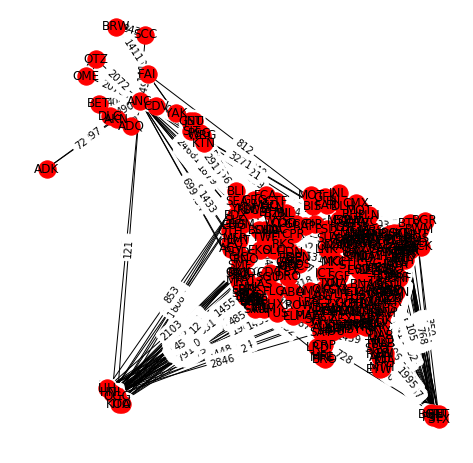

In [5]:
#Demo 1 continued
gf.describe()
gf.draw_network_attr(with_pos = True)

In [6]:
# Demo 2 one can use sub_graph_flow to generate sub_graph_flow
sub_nodes=set(list(gf.G.nodes)[:3])
sub_gf=gf.sub_graph_flow('2007-02-01 01:00:00','2007-03-01 01:00:00',sub_nodes)

=========Testing  ABE ==========airports remains : 3 ========time lasted so far:  0.0
loading finished: 0.0
AbsDepTime columnn generated: 0.006982564926147461
AbsArrTime columnn generated: 0.012966632843017578
data concated: 0.01894974708557129
fun_1_ts_gen ended: 0.01994776725769043


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  BWI ==========airports remains : 2 ========time lasted so far:  0.22497868537902832
loading finished: 0.0
AbsDepTime columnn generated: 0.005985260009765625
AbsArrTime columnn generated: 0.012966394424438477
data concated: 0.018950939178466797
fun_1_ts_gen ended: 0.019947528839111328


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  ATL ==========airports remains : 1 ========time lasted so far:  0.6518676280975342
loading finished: 0.0
AbsDepTime columnn generated: 0.006952047348022461
AbsArrTime columnn generated: 0.012935876846313477
data concated: 0.01891946792602539
fun_1_ts_gen ended: 0.01891946792602539
======================Total time: 1.1215829849243164
(673, 3)
(673, 3)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-03-01 01:00:00-08:00
All data frame has shape: (673, 3)


,ABE,ATL,BWI
2007-02-01 01:00:00-08:00,0,0,0
2007-02-01 02:00:00-08:00,0,0,0
2007-02-01 03:00:00-08:00,1,0,1


,Year,Month,DayofMonth,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,AirTime,TaxiIn,TaxiOut,AbsDepTime,AbsArrTime
904438,2007,2,15,759,1003,5,4,BWI,ATL,95,6,23,2007-02-15 04:59:00-08:00,2007-02-15 07:03:00-08:00
904458,2007,2,15,1136,1334,-1,-4,BWI,ATL,97,6,15,2007-02-15 08:36:00-08:00,2007-02-15 10:34:00-08:00
904557,2007,2,15,1338,1515,45,53,ATL,BWI,77,7,13,2007-02-15 10:38:00-08:00,2007-02-15 12:15:00-08:00


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


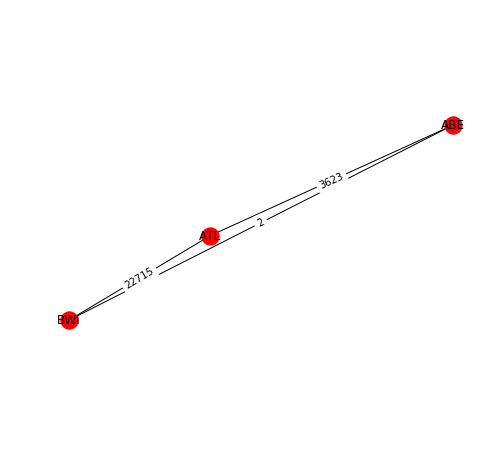

In [7]:
sub_gf.describe()
sub_gf.draw_network_attr(with_pos = False)

(673, 311)
(673, 311)
dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-03-01 01:00:00-08:00
All data frame has shape: (673, 311)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
2007-02-01 01:00:00-08:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-02-01 02:00:00-08:00,1,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
2007-02-01 03:00:00-08:00,4,1,0,0,0,0,0,1,0,0,...,0,4,1,0,0,0,2,0,0,0


,Year,Month,DayofMonth,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,AirTime,TaxiIn,TaxiOut,AbsDepTime,AbsArrTime
154545,2007,1,31,2355,100,-14,0,LAS,FAT,42,8,15,2007-01-31 23:55:00-08:00,2007-02-01 01:00:00-08:00
154550,2007,1,31,2359,100,-12,0,LAS,PSP,43,8,10,2007-01-31 23:59:00-08:00,2007-02-01 01:00:00-08:00
154554,2007,1,31,2359,115,-11,0,LAS,SJC,57,5,14,2007-01-31 23:59:00-08:00,2007-02-01 01:15:00-08:00


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


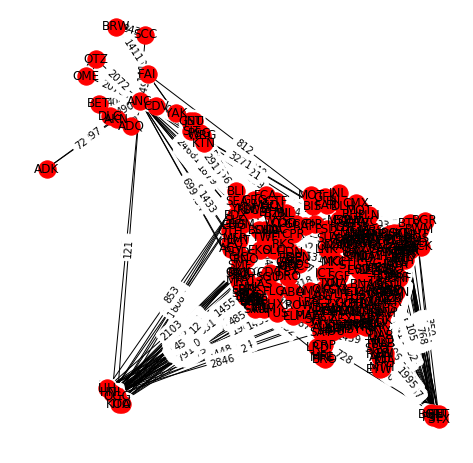

In [8]:
# Demo 3 if sub_nodes is none. gf.sub_graph_flow is quite fast
sub_gf=gf.sub_graph_flow('2007-02-01 01:00:00','2007-03-01 01:00:00',sub_nodes = None)
sub_gf.describe()
sub_gf.draw_network_attr(with_pos = True)

## 2 Visualization for the GraphFlow

In [9]:
def analysis_2(sub_nodes,st_time,end_time,airport):
    sub_gf=gf.sub_graph_flow(st_time,end_time,sub_nodes)
    sub_gf.describe()
    sub_gf.draw_network_attr(with_pos = False)
    airports = list(sub_gf.G.succ[airport])
    
    
    lax_pre_data = sub_gf.pre_data[sub_gf.pre_data.Dest == airport]
    lax_arr = pd.DataFrame(index = pd.to_datetime(lax_pre_data.AbsArrTime), columns = ['Arr'+ airport],data = 1)

    lax_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay >15].AbsArrTime), columns = ['ArrDelay'+ airport],data = 1)

    lax_arrdelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) &
                                            (lax_pre_data.DepDelay <15)].AbsArrTime), columns = ['ArrDelayNotDD'+ airport],data = 1)

    lax_arrnotdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) &
                                            (lax_pre_data.DepDelay >15)].AbsArrTime), columns = ['ArrNotDelayDD'+ airport],data = 1)

    lax_df = pd.concat([lax_arr, lax_arrdelay,lax_arrdelay_not_depdelay,lax_arrnotdelay_depdelay],sort = False).sort_index()
    
    dt = sub_gf.dt
    orgin_dfss = list(chain.from_iterable([orgin_dfs_gen(orgin_airport,lax_pre_data) for orgin_airport in airports ]))
    origin_lax_ts = pd.concat(orgin_dfss + [lax_df],sort = False).sort_index().groupby(pd.Grouper( freq= dt)).count()

    origin_lax_ts['Naive_1'] = origin_lax_ts[['EstArr'+airport for airport in airports ]].sum(axis = 1)

    origin_lax_ts['Naive_2_cheat']=origin_lax_ts['Naive_1'] + origin_lax_ts['ArrDelayNotDD'+airport]-origin_lax_ts['ArrNotDelayDD'+airport]

    origin_lax_ts.iloc[:,:-2].plot(subplots=True, legend=True,figsize=(16,origin_lax_ts.shape[1]))
    #display(origin_lax_ts.head())
    origin_lax_ts[['ArrDelay'+airport,'Naive_1']].plot(subplots=False, legend=True,figsize=(16,2))
    print('mean error for Naive_1:',abs(origin_lax_ts['ArrDelay'+airport]-origin_lax_ts['Naive_1']).mean())
    origin_lax_ts[['ArrDelay'+airport,'Naive_2_cheat']].plot(subplots=False, legend=True,figsize=(16,2))
    print('mean error for Naive_2_cheat:',abs(origin_lax_ts['ArrDelay'+airport]-origin_lax_ts['Naive_2_cheat']).mean())

def orgin_dfs_gen(orgin_airport,lax_pre_data):
    origin_lax_pre_data = lax_pre_data[lax_pre_data.Origin == orgin_airport]
    ArrIndexDelay = pd.DataFrame(index = pd.to_datetime(
        origin_lax_pre_data.AbsArrTime[origin_lax_pre_data.DepDelay >15]),
                                                     columns = ['ArrIdxDD'+orgin_airport],data = 1).sort_index()
    #display(ArrIndexDelay.head())

    DepIndex = pd.DataFrame(index = pd.to_datetime(origin_lax_pre_data.AbsDepTime),
                                                columns = ['DepIdx'+orgin_airport],data = 1).sort_index()
    #display(DepIndex.head())

    DepIndexDepDelay = pd.DataFrame(index = pd.to_datetime(origin_lax_pre_data.AbsDepTime[origin_lax_pre_data.DepDelay >15]),
                                                        columns = ['DepIdxDD'+orgin_airport],data = 1).sort_index()
    #display(DepIndexDepDelay.head())

    mean_delay = origin_lax_pre_data[origin_lax_pre_data.DepDelay >15][['AirTime','TaxiIn','TaxiOut']].sum(axis = 1).mean()
    shift_dt = timedelta(seconds = round(mean_delay)*60) 
    shift_dt
    EstArrIndex =pd.DataFrame(index = DepIndexDepDelay.index.shift(periods = 1,freq = shift_dt), columns = ['EstArr'+orgin_airport],data = 1) 
    #display(EstArrIndex.head())
    
    orgin_dfs = [DepIndex,DepIndexDepDelay,ArrIndexDelay,EstArrIndex]
    return orgin_dfs

=========Testing  HNL ==========airports remains : 4 ========time lasted so far:  0.0
loading finished: 0.0
AbsDepTime columnn generated: 0.008975982666015625
AbsArrTime columnn generated: 0.01695394515991211
data concated: 0.0249330997467041
fun_1_ts_gen ended: 0.0249330997467041


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  LAS ==========airports remains : 3 ========time lasted so far:  0.5545186996459961
loading finished: 0.0
AbsDepTime columnn generated: 0.009973287582397461
AbsArrTime columnn generated: 0.018949270248413086
data concated: 0.024933576583862305
fun_1_ts_gen ended: 0.024933576583862305


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  OGG ==========airports remains : 2 ========time lasted so far:  0.9883582592010498
loading finished: 0.0
AbsDepTime columnn generated: 0.008977174758911133
AbsArrTime columnn generated: 0.018950462341308594
data concated: 0.02693009376525879
fun_1_ts_gen ended: 0.02693009376525879
=========Testing  LAX ==========airports remains : 1 ========time lasted so far:  1.4221994876861572
loading finished: 0.0
AbsDepTime columnn generated: 0.008975505828857422
AbsArrTime columnn generated: 0.017951011657714844
data concated: 0.0249326229095459
fun_1_ts_gen ended: 0.025928735733032227
======================Total time: 1.9500782489776611
(337, 4)
(337, 4)
dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-02-15 01:00:00-08:00
All data frame has shape: (337, 4)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


,HNL,LAS,LAX,OGG
2007-02-01 01:00:00-08:00,3,0,0,0
2007-02-01 02:00:00-08:00,1,1,0,1
2007-02-01 03:00:00-08:00,0,0,0,0


,Year,Month,DayofMonth,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,AirTime,TaxiIn,TaxiOut,AbsDepTime,AbsArrTime
225514,2007,1,31,2135,422,-24,-5,OGG,LAX,272,2,13,2007-01-31 23:35:00-08:00,2007-02-01 04:22:00-08:00
226633,2007,1,31,2126,418,-28,-5,HNL,LAX,274,5,13,2007-01-31 23:26:00-08:00,2007-02-01 04:18:00-08:00
379685,2007,1,31,2246,620,-5,-9,HNL,LAS,432,8,14,2007-02-01 00:46:00-08:00,2007-02-01 06:20:00-08:00


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


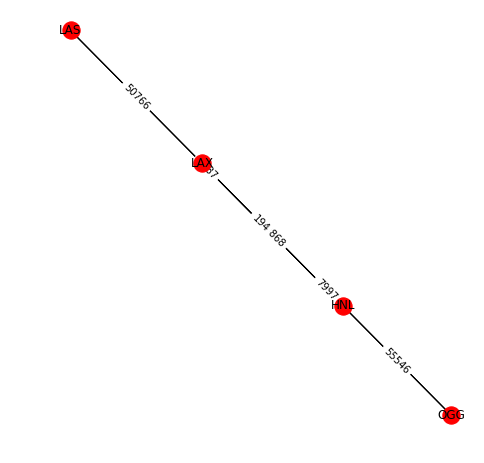

mean error for Naive_1: 0.27906976744186046
mean error for Naive_2_cheat: 0.18604651162790697


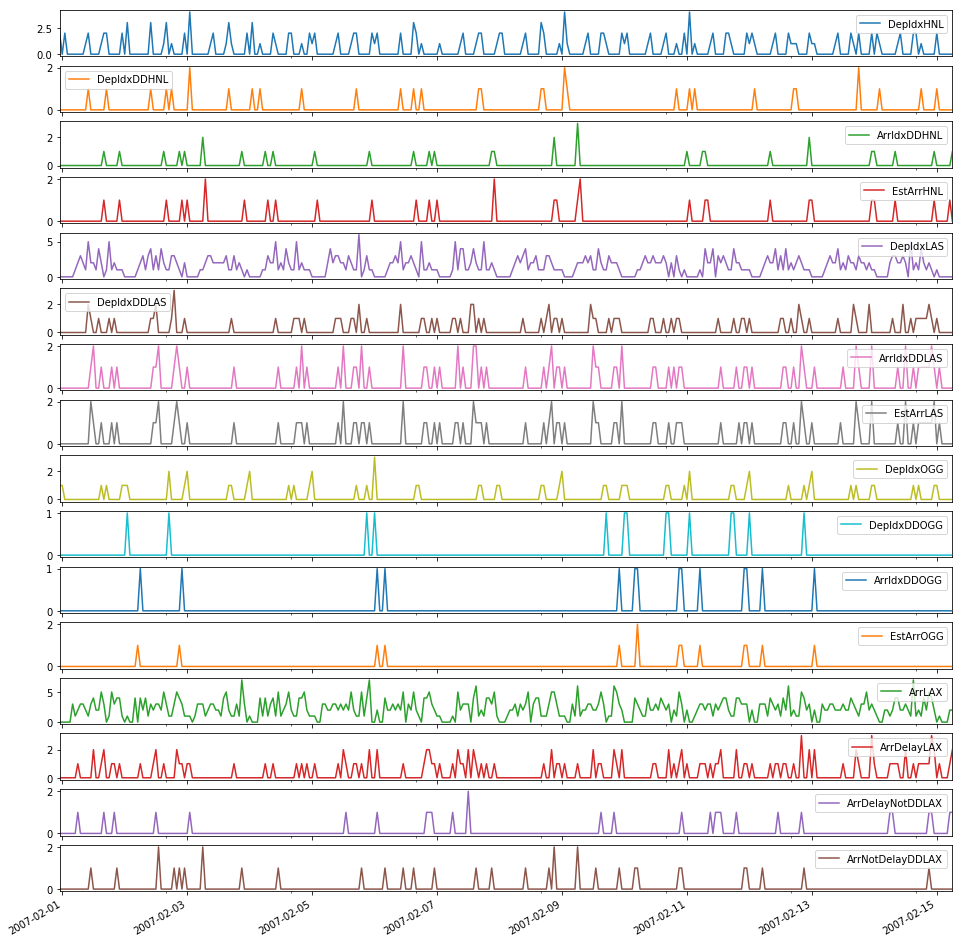

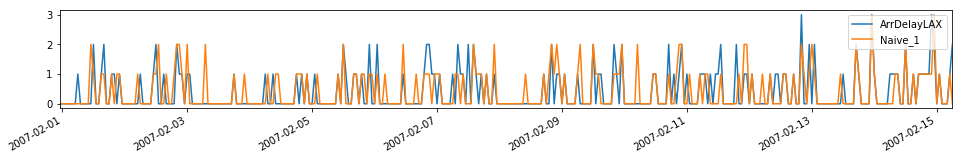

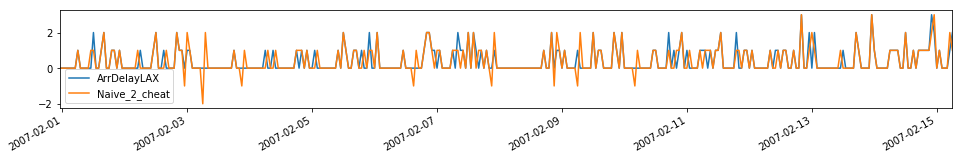

In [10]:
analysis_2(set(['LAX','LAS','OGG','HNL']),'2007-02-01 01:00:00','2007-02-15 01:00:00','LAX')

In [11]:

sub_nodes=set(['LAX','LAS','OGG','HNL','ORD','DFW','DEN','JFK'])
sub_gf=gf.sub_graph_flow('2007-02-01 01:00:00','2007-02-15 01:00:00',sub_nodes)

=========Testing  OGG ==========airports remains : 8 ========time lasted so far:  0.0
loading finished: 0.0
AbsDepTime columnn generated: 0.0139617919921875
AbsArrTime columnn generated: 0.03291177749633789
data concated: 0.04089069366455078
fun_1_ts_gen ended: 0.04089069366455078


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  DEN ==========airports remains : 7 ========time lasted so far:  0.47273707389831543
loading finished: 0.0
AbsDepTime columnn generated: 0.017951488494873047
AbsArrTime columnn generated: 0.03291130065917969
data concated: 0.04088997840881348
fun_1_ts_gen ended: 0.04088997840881348


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  DFW ==========airports remains : 6 ========time lasted so far:  1.3005237579345703
loading finished: 0.0
AbsDepTime columnn generated: 0.01595783233642578
AbsArrTime columnn generated: 0.029920578002929688
data concated: 0.03789925575256348
fun_1_ts_gen ended: 0.038895368576049805


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  ORD ==========airports remains : 5 ========time lasted so far:  2.118338108062744
loading finished: 0.0
AbsDepTime columnn generated: 0.017952680587768555
AbsArrTime columnn generated: 0.03390932083129883
data concated: 0.041889190673828125
fun_1_ts_gen ended: 0.041889190673828125


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  HNL ==========airports remains : 4 ========time lasted so far:  2.9730541706085205
loading finished: 0.0
AbsDepTime columnn generated: 0.01595783233642578
AbsArrTime columnn generated: 0.030521869659423828
data concated: 0.037465810775756836
fun_1_ts_gen ended: 0.038469791412353516


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  JFK ==========airports remains : 3 ========time lasted so far:  3.5440943241119385
loading finished: 0.0
AbsDepTime columnn generated: 0.016989707946777344
AbsArrTime columnn generated: 0.032948970794677734
data concated: 0.038896799087524414
fun_1_ts_gen ended: 0.03989386558532715


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  LAS ==========airports remains : 2 ========time lasted so far:  4.008852005004883
loading finished: 0.0
AbsDepTime columnn generated: 0.017990589141845703
AbsArrTime columnn generated: 0.03394746780395508
data concated: 0.04291939735412598
fun_1_ts_gen ended: 0.04391813278198242


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  LAX ==========airports remains : 1 ========time lasted so far:  4.916541337966919
loading finished: 0.0
AbsDepTime columnn generated: 0.018953561782836914
AbsArrTime columnn generated: 0.03490781784057617
data concated: 0.04488062858581543
fun_1_ts_gen ended: 0.04488062858581543
======================Total time: 6.069458246231079
(337, 8)
(337, 8)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-02-15 01:00:00-08:00
All data frame has shape: (337, 8)


,DEN,DFW,HNL,JFK,LAS,LAX,OGG,ORD
2007-02-01 01:00:00-08:00,0,0,4,0,1,3,0,0
2007-02-01 02:00:00-08:00,0,0,1,1,1,0,1,3
2007-02-01 03:00:00-08:00,0,2,0,7,0,0,0,7


,Year,Month,DayofMonth,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,AirTime,TaxiIn,TaxiOut,AbsDepTime,AbsArrTime
224452,2007,1,31,1707,456,-14,-8,HNL,ORD,452,5,12,2007-01-31 19:07:00-08:00,2007-02-01 02:56:00-08:00
225099,2007,1,31,2319,722,66,69,LAX,JFK,278,9,16,2007-01-31 23:19:00-08:00,2007-02-01 04:22:00-08:00
225126,2007,1,31,2320,729,-11,-10,LAX,JFK,284,8,17,2007-01-31 23:20:00-08:00,2007-02-01 04:29:00-08:00


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


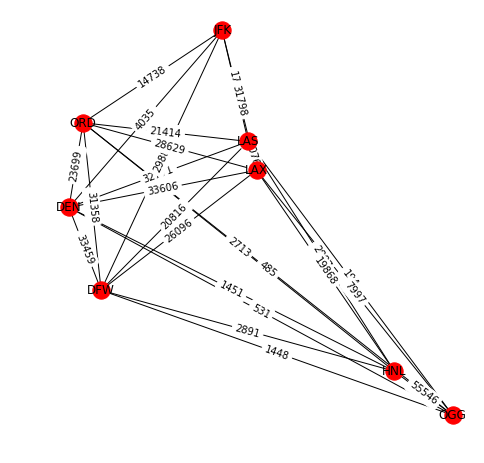

In [12]:
sub_gf.describe()
sub_gf.draw_network_attr(with_pos = False)

In [13]:
airports = list(sub_gf.G.succ['LAX'])

In [14]:
lax_pre_data = sub_gf.pre_data[sub_gf.pre_data.Dest == 'LAX']

In [15]:
lax_arr = pd.DataFrame(index = pd.to_datetime(lax_pre_data.AbsArrTime), columns = ['ArrLAX'],data = 1)

lax_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay >15].AbsArrTime), columns = ['ArrDelay'+'LAX'],data = 1)

lax_arrdelay_not_depdelay = pd.DataFrame(
    index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) &
                                        (lax_pre_data.DepDelay <15)].AbsArrTime), columns = ['ArrDelayNotDD'+'LAX'],data = 1)

lax_arrnotdelay_depdelay = pd.DataFrame(
    index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) &
                                        (lax_pre_data.DepDelay >15)].AbsArrTime), columns = ['ArrNotDelayDD'+'LAX'],data = 1)

lax_df = pd.concat([lax_arr, lax_arrdelay,lax_arrdelay_not_depdelay,lax_arrnotdelay_depdelay],sort = False).sort_index()

In [16]:
lax_df.head(7)

,ArrLAX,ArrDelayLAX,ArrDelayNotDDLAX,ArrNotDelayDDLAX
AbsArrTime,,,,
2007-02-01 01:14:00-08:00,1.0,NaN,NaN,NaN
2007-02-01 01:14:00-08:00,NaN,1.0,NaN,NaN
2007-02-01 04:18:00-08:00,1.0,NaN,NaN,NaN
2007-02-01 04:22:00-08:00,1.0,NaN,NaN,NaN
2007-02-01 04:57:00-08:00,1.0,NaN,NaN,NaN
2007-02-01 05:07:00-08:00,1.0,NaN,NaN,NaN
2007-02-01 06:25:00-08:00,1.0,NaN,NaN,NaN


,DepIdxDEN,DepIdxDDDEN,ArrIdxDDDEN,EstArrDEN,DepIdxDFW,DepIdxDDDFW,ArrIdxDDDFW,EstArrDFW,DepIdxHNL,DepIdxDDHNL,...,DepIdxORD,DepIdxDDORD,ArrIdxDDORD,EstArrORD,ArrLAX,ArrDelayLAX,ArrDelayNotDDLAX,ArrNotDelayDDLAX,Naive_1,Naive_2_cheat
2007-01-31 22:00:00-08:00,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-01-31 23:00:00-08:00,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2007-02-01 00:00:00-08:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-02-01 01:00:00-08:00,0,0,0,0,0,0,1,1,2,0,...,0,0,0,0,1,1,0,0,1,1
2007-02-01 02:00:00-08:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


mean error for Naive_1: 0.7333333333333333
mean error for Naive_2_cheat: 0.4492753623188406


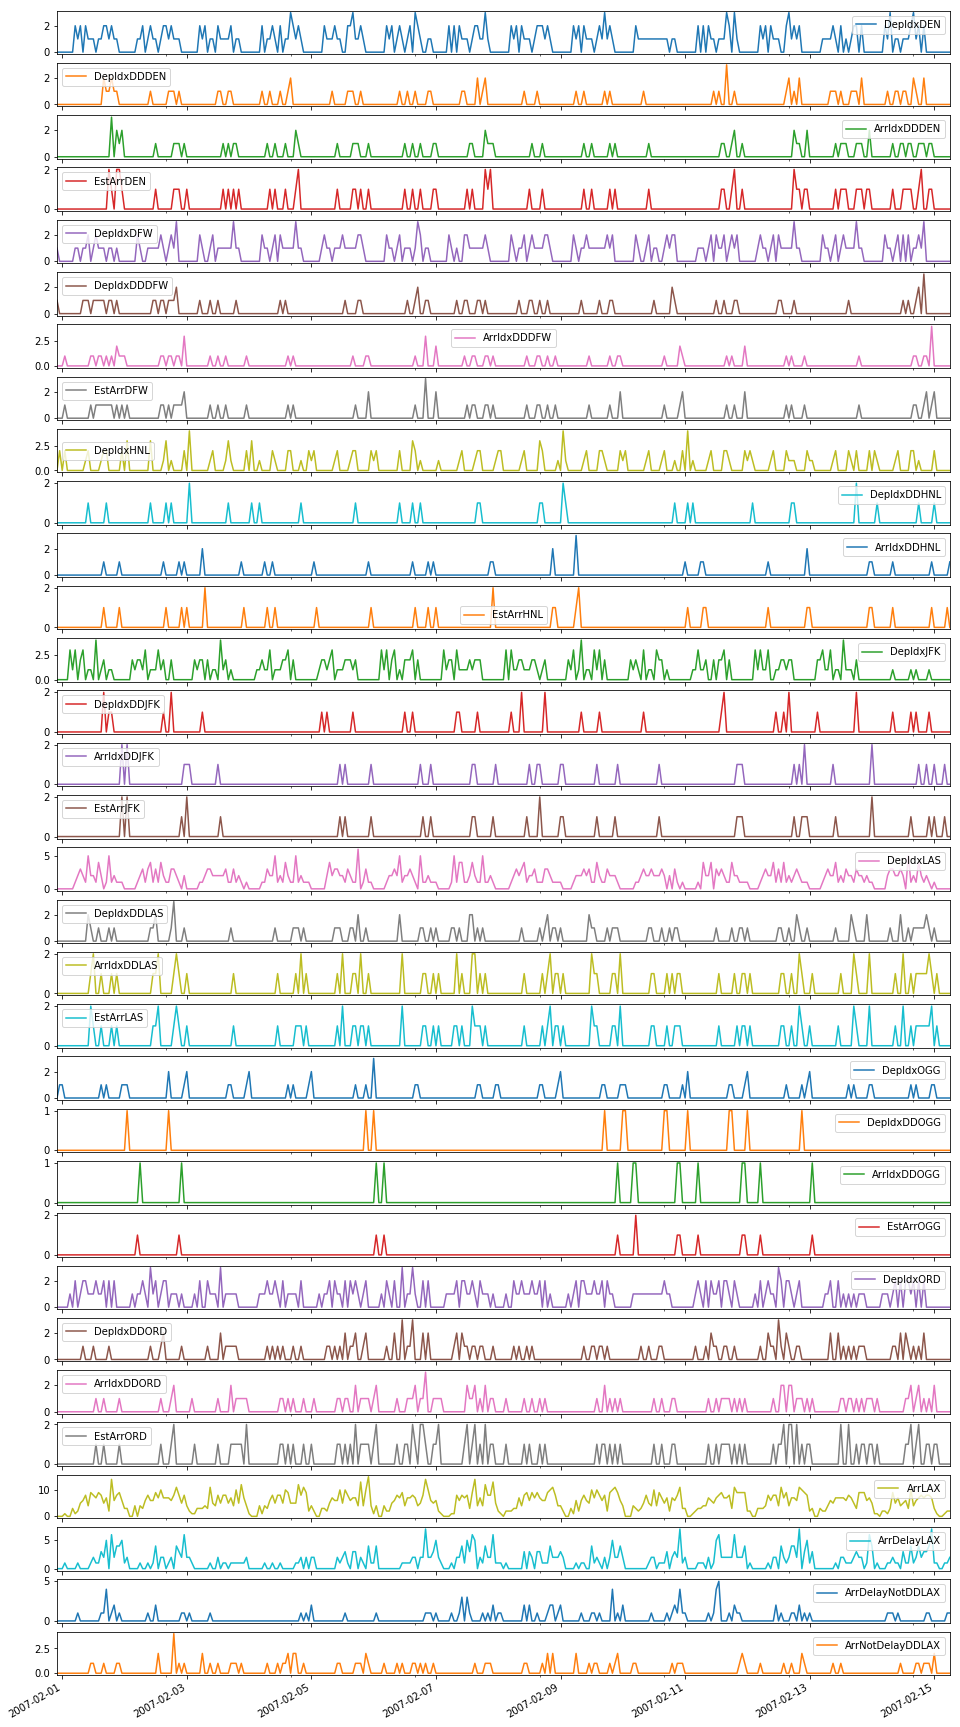

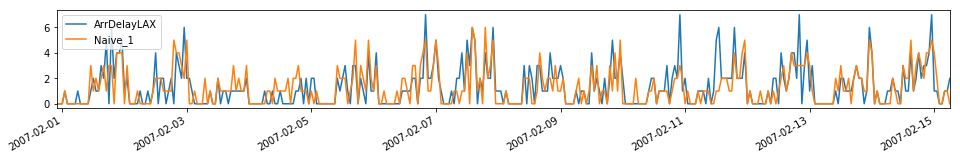

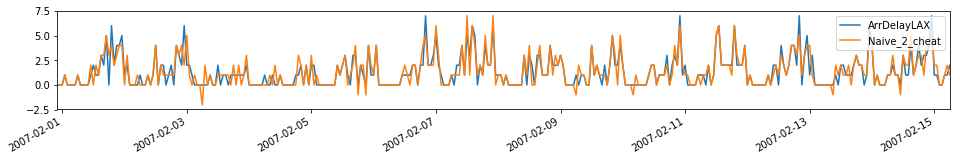

In [17]:
dt = sub_gf.dt
orgin_dfss = list(chain.from_iterable([orgin_dfs_gen(orgin_airport,lax_pre_data) for orgin_airport in airports ]))
origin_lax_ts = pd.concat(orgin_dfss + [lax_df],sort = False).sort_index().groupby(pd.Grouper( freq = dt)).count()

origin_lax_ts['Naive_1'] = origin_lax_ts[['EstArr'+airport for airport in airports ]].sum(axis = 1)

origin_lax_ts['Naive_2_cheat'] = origin_lax_ts['Naive_1'] + origin_lax_ts['ArrDelayNotDDLAX']-origin_lax_ts['ArrNotDelayDDLAX']

origin_lax_ts.iloc[:,:-2].plot(subplots = True, legend = True,figsize = (16,origin_lax_ts.shape[1]))
display(origin_lax_ts.head())
origin_lax_ts[['ArrDelayLAX','Naive_1']].plot(subplots = False, legend = True,figsize = (16,2))
print('mean error for Naive_1:',abs(origin_lax_ts['ArrDelayLAX']-origin_lax_ts['Naive_1']).mean())
origin_lax_ts[['ArrDelayLAX','Naive_2_cheat']].plot(subplots = False, legend = True,figsize = (16,2))
print('mean error for Naive_2_cheat:',abs(origin_lax_ts['ArrDelayLAX'] - origin_lax_ts['Naive_2_cheat']).mean())


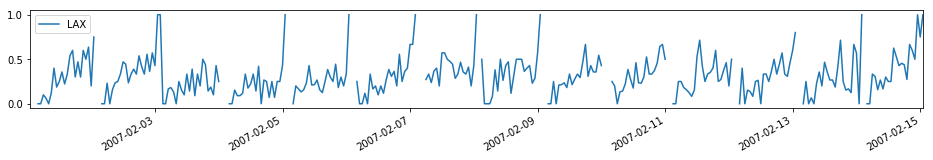

In [18]:
sub_gf.RealDelayRatio['LAX'].plot(legend=True,figsize=(16,2))

In [19]:
lax_test = lax_df.sort_index().groupby(pd.Grouper( freq = dt)).count()
lax_test.columns

Index(['ArrLAX', 'ArrDelayLAX', 'ArrDelayNotDDLAX', 'ArrNotDelayDDLAX'], dtype='object')

In [20]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = origin_lax_ts[['ArrLAX']]

model = pm.auto_arima(df.values, start_p = 1, start_q = 1,
                      test = 'adf',       # use adftest to find optimal 'd'
                      max_p = 3, max_q = 3, # maximum p and q
                      m = 1,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal = False,   # No Seasonality
                      start_P = 0, 
                      D = 0, 
                      trace = True,
                      error_action = 'ignore',  
                      suppress_warnings = True, 
                      stepwise = True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=1686.011, BIC=1701.385, Fit time=0.102 seconds
Fit ARIMA: order=(0, 0, 0); AIC=1806.646, BIC=1814.333, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=1699.184, BIC=1710.714, Fit time=0.023 seconds
Fit ARIMA: order=(0, 0, 1); AIC=1741.592, BIC=1753.123, Fit time=0.023 seconds
Fit ARIMA: order=(2, 0, 1); AIC=1680.844, BIC=1700.062, Fit time=0.112 seconds
Fit ARIMA: order=(2, 0, 0); AIC=1678.878, BIC=1694.252, Fit time=0.040 seconds
Fit ARIMA: order=(3, 0, 1); AIC=1644.668, BIC=1667.729, Fit time=0.304 seconds
Fit ARIMA: order=(3, 0, 0); AIC=1680.782, BIC=1700.000, Fit time=0.073 seconds
Fit ARIMA: order=(3, 0, 2); AIC=1641.214, BIC=1668.119, Fit time=0.383 seconds
Fit ARIMA: order=(2, 0, 2); AIC=1670.015, BIC=1693.076, Fit time=0.174 seconds
Fit ARIMA: order=(3, 0, 3); AIC=1670.305, BIC=1701.054, Fit time=0.323 seconds
Total fit time: 1.590 seconds
                              ARMA Model Results                              
Dep. Variable:        

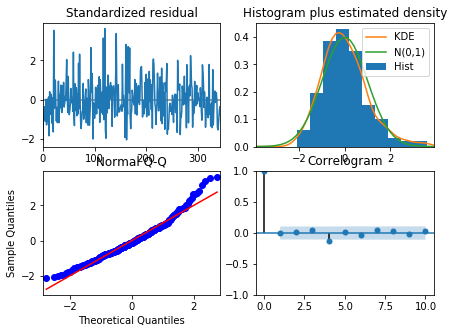

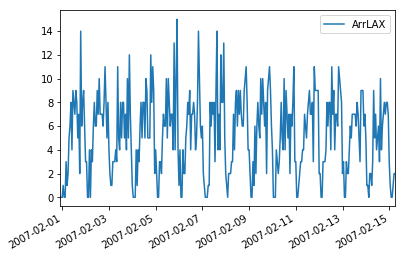

In [21]:
model.plot_diagnostics(figsize=(7,5))
df.plot()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018413146630>,
      dtype=object)

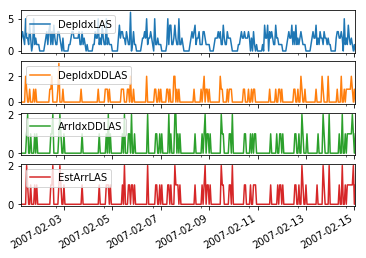

In [28]:
dt = sub_gf.dt
las_ts = pd.concat(orgin_dfs_gen('LAS',lax_pre_data),sort = False).sort_index().groupby(pd.Grouper( freq = dt)).count()
las_ts.plot(subplots = True,figure)